In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential
from keras.layers import Conv2D  ,MaxPooling2D,   Flatten  ,Dense  , Dropout
import os
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
path=r"C:\Users\hp laptop\Downloads\Brain tumor\data"

In [10]:
dis=os.listdir(path)
dis

['glioma', 'meningioma', 'notumor', 'pituitary']

In [11]:
dis.index('glioma')

0

In [12]:
Data=[]
for i in dis:
    A=os.path.join(path,i)
    for j in os.listdir(A):
        B=os.path.join(A,j)
        img=cv.imread(B)
        C=cv.resize(img,(150,150))
        T=dis.index(i)
        Data.append([C,T])

In [13]:
i=r"C:\Users\hp laptop\Downloads\Brain tumor\data\notumor\Te-no_0403.jpg"

In [14]:
k=cv.imread(i)
k

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [15]:
k.shape

(225, 225, 3)

In [16]:
Data[1]

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 0]

In [17]:
len(Data)

1311

In [18]:
import random #for shuffle
random.shuffle(Data)

In [19]:
F=[]
T=[]
for i,j in Data:
    F.append(i)
    T.append(j)

In [20]:
T1=pd.get_dummies(T).replace({True:1,False:0})
T1

,0,1,2,3
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
1306,0,0,0,1
1307,0,1,0,0
1308,0,0,0,1
1309,0,0,1,0


In [21]:
F=np.array(F)

In [22]:
F1=F/255

In [23]:
F1[1]

array([[[0.07843137, 0.08627451, 0.09019608],
        [0.07843137, 0.08627451, 0.09019608],
        [0.07843137, 0.08627451, 0.09019608],
        ...,
        [0.07843137, 0.08627451, 0.09019608],
        [0.03921569, 0.04705882, 0.05098039],
        [0.5254902 , 0.53333333, 0.5372549 ]],

       [[0.07843137, 0.08627451, 0.09019608],
        [0.07843137, 0.08627451, 0.09019608],
        [0.07843137, 0.08627451, 0.09019608],
        ...,
        [0.07843137, 0.08627451, 0.09019608],
        [0.03921569, 0.04705882, 0.05098039],
        [0.5254902 , 0.53333333, 0.5372549 ]],

       [[0.07843137, 0.08627451, 0.09019608],
        [0.07843137, 0.08627451, 0.09019608],
        [0.07843137, 0.08627451, 0.09019608],
        ...,
        [0.07843137, 0.08627451, 0.09019608],
        [0.03921569, 0.04705882, 0.05098039],
        [0.5254902 , 0.53333333, 0.5372549 ]],

       ...,

       [[0.0745098 , 0.08235294, 0.08627451],
        [0.0745098 , 0.08235294, 0.08627451],
        [0.0745098 , 0

In [24]:
F1.shape

(1311, 150, 150, 3)

In [25]:
T1.shape

(1311, 4)

In [26]:
T2=np.array(T1)

In [27]:
from keras.layers import Dense,Lambda,Input,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential

In [28]:
vgg=VGG16(input_shape=[150,150,3]
          ,weights='imagenet',
          include_top=False)

In [29]:
for i in vgg.layers:
    i.trainable=False

In [30]:
x=Flatten()(vgg.output)

In [31]:
z=Dense(4,activation='sigmoid')(x)

In [32]:
model=Model(vgg.input,z)

In [33]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(F1,T2,epochs=5,validation_split=0.15,batch_size=15)

Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 283s 4s/step - accuracy: 0.8426 - loss: 0.4483 - val_accuracy: 0.8629 - val_loss: 0.3828
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.8922 - loss: 0.3090 - val_accuracy: 0.8832 - val_loss: 0.3679
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 403s 5s/step - accuracy: 0.9220 - loss: 0.2480 - val_accuracy: 0.8832 - val_loss: 0.3483
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.9398 - loss: 0.2150 - val_accuracy: 0.8934 - val_loss: 0.3170
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9400 - loss: 0.1788 - val_accuracy: 0.9036 - val_loss: 0.2984


In [36]:
test=r"C:\Users\hp laptop\Downloads\Brain tumor\data\notumor\Te-no_0400.jpg"

In [37]:
A1=cv.imread(test)
A1

array([[[ 10,  22,  16],
        [ 10,  22,  16],
        [ 10,  22,  16],
        ...,
        [ 12,  22,  16],
        [ 12,  22,  16],
        [ 12,  22,  16]],

       [[  0,   6,   0],
        [  0,   6,   0],
        [  0,   6,   0],
        ...,
        [  0,   6,   0],
        [  0,   5,   0],
        [  0,   6,   0]],

       [[  0,   5,   2],
        [  0,   5,   2],
        [  0,   5,   2],
        ...,
        [  0,   5,   2],
        [  0,   4,   2],
        [  0,   5,   2]],

       ...,

       [[110,  52,   3],
        [110,  53,   2],
        [110,  52,   3],
        ...,
        [ 66,  33,   0],
        [ 83,  47,   0],
        [ 86,  49,   0]],

       [[ 98,  58,   0],
        [ 98,  58,   0],
        [ 98,  58,   0],
        ...,
        [107,  61,  14],
        [117,  68,  20],
        [111,  60,  10]],

       [[ 88,  57,   0],
        [ 88,  57,   0],
        [ 88,  57,   0],
        ...,
        [124,  72,  26],
        [ 86,  27,   0],
        [ 98,  39,   0]]

In [38]:
A2=cv.resize(A1,(150,150))

In [39]:
A3=np.reshape(A2,(1,150,150,3))

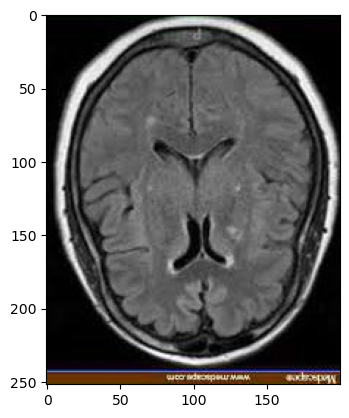

In [40]:
plt.imshow(A1)

In [41]:
pred=model.predict(A3)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


array([[0.0000000e+00, 6.6311074e-18, 1.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [42]:
pred[0][0]

0.0

In [43]:
if pred[0][0]<10:
    print('Tumor')
else:
    print('Normal')

Tumor


In [44]:
path_test=r"C:\Users\hp laptop\Downloads\Brain tumor\data"

In [45]:
ct2=['pituitary','notumor','meningioma','glioma']
Data1=[]
for i in ct2:
    A=os.path.join(path_test,i)
    #print(i)
    #print(A)
    for j in os.listdir(A):
        B=os.path.join(A,j)
        #print(B)
        img=cv.imread(B)
        #print(img.shape)
        #plt.imshow(img)
        #plt.show()
        array=cv.resize(img,(150,150))
        #print(array.shape)
        #plt.imshow(array)
        #plt.show()
        labels=ct2.index(i)
        #print(labels)
        Data1.append([array,labels])                                                 

In [46]:
F=[]
T=[]
for i,j in Data1:
    F.append(i)
    T.append(j)

In [47]:
F=np.array(F)
T=np.array(T)

In [48]:
F=F/255

In [49]:
T

array([0, 0, 0, ..., 3, 3, 3])

In [50]:
pred2=model.predict(F)
pred2

41/41 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step


array([[4.3487530e-03, 2.8423530e-01, 4.3214327e-03, 9.7413099e-01],
       [9.3261935e-02, 1.7706957e-01, 3.1361966e-03, 9.4823575e-01],
       [1.2851878e-01, 3.5495070e-01, 1.3767336e-03, 3.4369513e-01],
       ...,
       [9.4530445e-01, 6.8486631e-01, 3.3461884e-02, 4.9895159e-04],
       [8.8227016e-01, 1.2356397e-01, 2.1619026e-01, 9.4554471e-03],
       [6.0660064e-01, 1.9950444e-01, 1.8752238e-02, 4.5173578e-02]],
      dtype=float32)

In [51]:
Final=[]
for i in pred2:
    Final.append(np.argmax(i))

In [54]:
Final

[3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [55]:
T

array([0, 0, 0, ..., 3, 3, 3])

In [56]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy_score(T,Final)


0.0038138825324180014

In [57]:
confusion_matrix(T,Final)

array([[  0,   3,   0, 297],
       [  1,   0, 404,   0],
       [ 11, 281,   5,   9],
       [287,  13,   0,   0]], dtype=int64)

In [59]:
print(classification_report(T,Final))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.00      0.00      0.00       405
           2       0.01      0.02      0.01       306
           3       0.00      0.00      0.00       300

    accuracy                           0.00      1311
   macro avg       0.00      0.00      0.00      1311
weighted avg       0.00      0.00      0.00      1311

